In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import requests
from networkx.readwrite import json_graph
import json

In [2]:
g = nx.grid_graph([10,10])
SD = False
SI=4
SR = 0
gamma = .06
beta = .05
num_steps = 100
stp = 10
useR = True
spontaneous = 0
snodes = 200

In [3]:
if SD ==True:

    data = json.load("data/county05.json")
    g = json_graph.adjacency_graph(data)

shape = False

nlist = list(g.nodes())
n = len(nlist)




if SD == False:
    pos = nx.kamada_kawai_layout(g)
else:
    pos = {x:(g.nodes[x]['C_X'],g.nodes[x]['C_Y']) for x in g.nodes()}




initial_infection = SI
initial_R = SR
recover = beta
spread = gamma
reinfect = not useR#True#False

S={n for n in nlist}
I=set()
R=set()

Ss=[len(g.nodes())]
Is=[]
Rs=[0]

ncs = {x:0 for x in nlist}

num_steps = 100

colordict= {0:'y',1:'r',2:'g'}

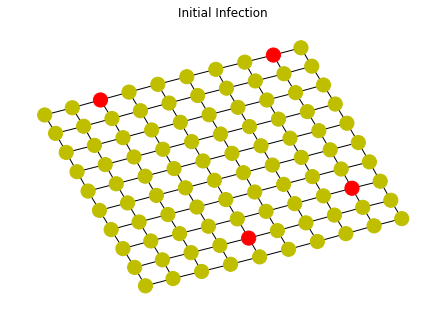

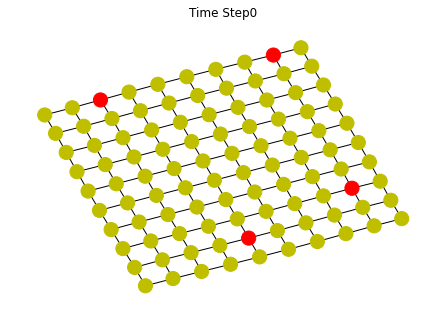

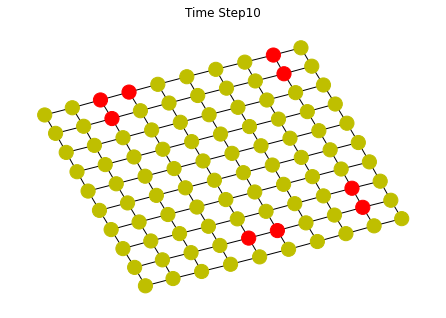

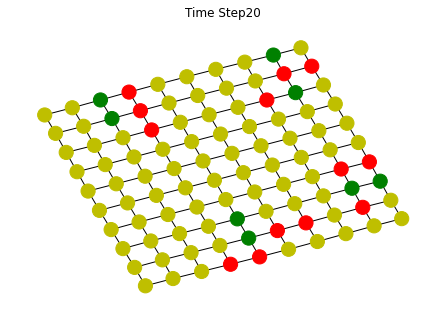

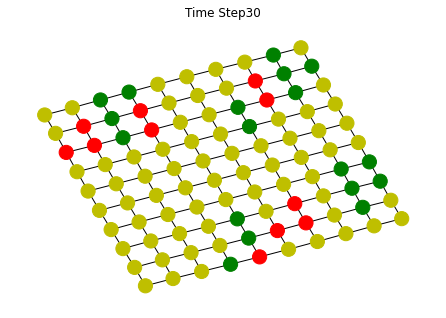

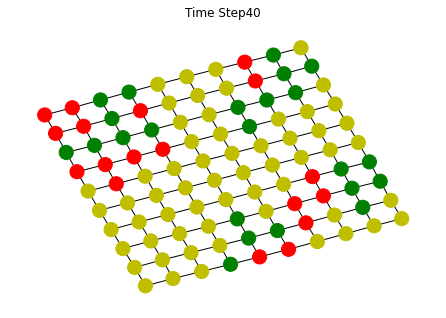

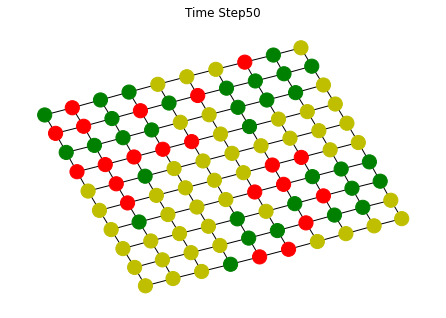

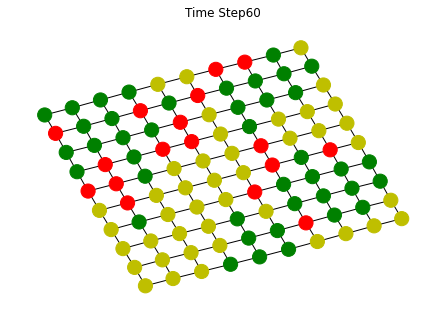

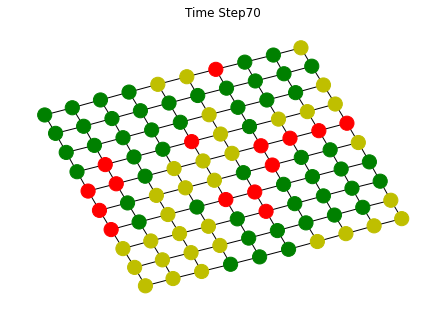

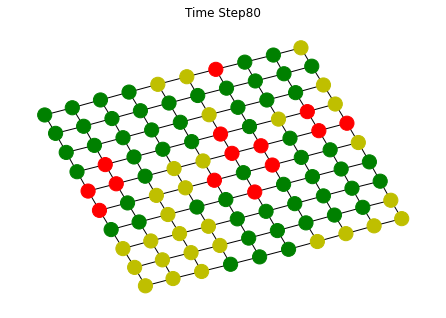

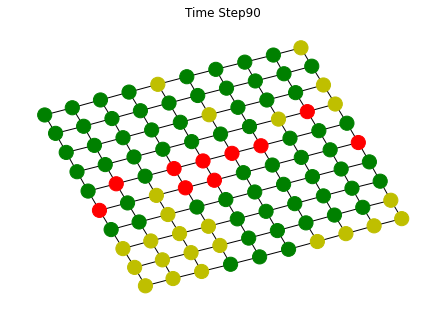

In [5]:
for i in range(initial_infection):
    infected = random.choice(nlist)
    ncs[infected] = 1
    I.add(infected)
    S.remove(infected)


for i in range(initial_R):
    immune = random.choice(list(S))
    ncs[immune] = 2
    R.add(immune)
    S.remove(immune)

Ss.append(len(S))
Is.append(len(I))
Rs.append(len(R))




plt.figure()
nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
plt.title("Initial Infection")
plt.show()


for step in range(num_steps):

    for i in range(n):
        if ncs[nlist[i]] == 1:
            if random.random() < recover:
                if reinfect:
                    ncs[nlist[i]] = 0
                    I.remove(nlist[i])
                    S.add(nlist[i])
                else:
                    ncs[nlist[i]] = 2
                    I.remove(nlist[i])
                    R.add(nlist[i])
        elif ncs[nlist[i]] == 0:
            sick = 0
            for neighbor in g.neighbors(nlist[i]):
                if ncs[neighbor] == 1:
                    if np.random.binomial(1,spread) == 1:
                        sick = 1  
                        I.add(nlist[i])
                        S.remove(nlist[i])
                        break
            ncs[nlist[i]] = sick

    Ss.append(len(S))
    Is.append(len(I))
    Rs.append(len(R))

    if step %int(num_steps/stp) == 0:
        plt.figure()
        nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
        plt.title("Time Step" + str(step))
        plt.show()


    if spontaneous > 0:
        num_infect = np.random.binomial(Ss[-1],spontaneous)
        for j in range(num_infect):
            infected = random.choice(list(S))
            ncs[infected] = 1
            I.add(infected)
            S.remove(infected)


    elif Is[-1]==0:
        break

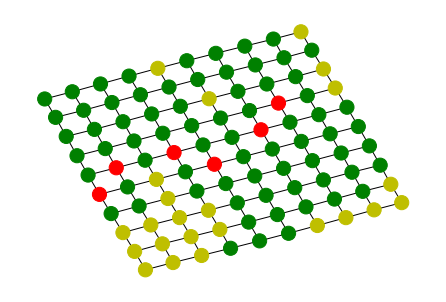

In [6]:
nx.draw(g,pos=pos,node_color=[colordict[ncs[x]] for x in nlist],node_size = snodes)
plt.show()

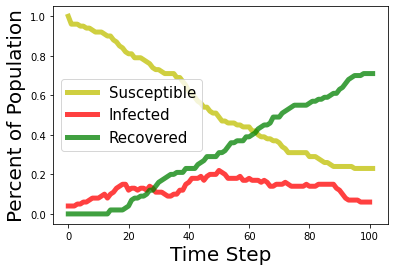

In [7]:
plt.figure()
plt.plot([x/n for x in Ss],alpha=0.75, color = 'y', lw = 5, label='Susceptible')           
plt.plot([x/n for x in Is],alpha=0.75, color = 'r', lw = 5, label='Infected')   
plt.plot([x/n for x in Rs],alpha=0.75, color = 'g', lw = 5, label='Recovered')    
plt.legend(fontsize=15)
plt.ylabel("Percent of Population", fontsize = 20)
plt.xlabel("Time Step", fontsize = 20)
plt.show()